# Homework #2: Multiple Regressions and Assumptions of Regression
## Background
The US Department of Agriculture (USDA) publishes county-level datasets on poverty, population, unemployment, income and Education (https://www.ers.usda.gov/data-products/county-level-data-sets/). Imagine you're working for the USDA as a Data Scientist and you've been tasked with putting together an analysis of the influence of education, in rural vs urban communities, on household income and unemployment.

The USDA defines the rural vs urban on a continuum from 1 to 9 with 1 referring to the largest counties (for reference, Cache Valley was listed as a 3 in 2013). The full scale is shown below:

1. Metro - Counties in metro areas of 1 million population or more                                               
2. Metro - Counties in metro areas of 250,000 to 1 million population                                                   
3. Metro - Counties in metro areas of fewer than 250,000 population                                                     
4. Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                                             
5. Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                                         
6. Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                                             
7. Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                                         
8. Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area                           
9. Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area

**Relevant Datasets**
In the `education_unemployment` folder:
* `education.csv`
* `unemployment.csv`

## Task 1
Merge these two datasets on the FIPS code for each county.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from math import sqrt

dfed = pd.read_csv('education.csv')
dfue = pd.read_csv('unemployment.csv')
df = dfed.merge(dfue, left_on = 'FIPS Code', right_on = 'FIPS_Code')
df['HS'] = 100 - df['Percent of adults with less than a high school diploma, 2015-19']
df['Urban'] = np.where(df['2013 Rural-urban Continuum Code'] <= 5, 1, 0)

df.head()

,FIPS Code,State_x,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,HS,Urban
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",...,268,3.1,"8,640","8,067",573,6.6,"47,918",92.6,79.1,1
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",...,680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2,80.5,1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",...,545,2.7,"19,592","18,618",974,5.0,"49,692",96.0,81.8,1
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656",...,"9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6,90.1,1
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",...,"1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3,84.6,1


## Task 2
Using this merged dataset, fit a model that predicts household income given the different variables of percent of the county reaching the different education levels. I'll leave it up to you how you decide to include the rural vs urban in your model (e.g. as a continuous variable, as a categorical variable, as a binary variable, by subsetting).

Tip: Does it make sense to include every education level in the model from a mathematical perspective?

In [2]:
dfed.columns

Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'City/Suburb/Town/Rural 2013',
       'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adu

In [3]:
df['Median_Household_Income_2019'] = df['Median_Household_Income_2019'].str.replace(',','')
df['Median_Household_Income_2019'] = pd.to_numeric(df['Median_Household_Income_2019'])

In [4]:
df = df.dropna()
results = smf.ols('Median_Household_Income_2019 ~ Urban + HS', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Median_Household_Income_2019   R-squared:                       0.362
Model:                                      OLS   Adj. R-squared:                  0.361
Method:                           Least Squares   F-statistic:                     881.9
Date:                          Fri, 03 Jun 2022   Prob (F-statistic):          3.18e-304
Time:                                  19:33:56   Log-Likelihood:                -33587.
No. Observations:                          3118   AIC:                         6.718e+04
Df Residuals:                              3115   BIC:                         6.720e+04
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.973e+04   2900.866    -13.697      0.000   -4.54e+04    -3.4e+04
Urban       9009.5051    422.921     21.303      0.000    8180.272    9838.738
HS          1048.4812     33.668     31.142      0.000     982.468    1114.495
==============================================================================
Omnibus:                     1079.132   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4643.189
Skew:                           1.637   Prob(JB):                         0.00
Kurtosis:                       8.002   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Task 3

Consider all of the regression assumptions that must be met, do any transformations you deem necessary, and then refit the model. Interpret the regression results (explain assumptions that are broken) and provide an answer to the question of "how does education level attained influence household income in rural vs urban communities".

Also, provide an answer in layman's terms that you could report to stakeholders that may or may not be familiar with regression.

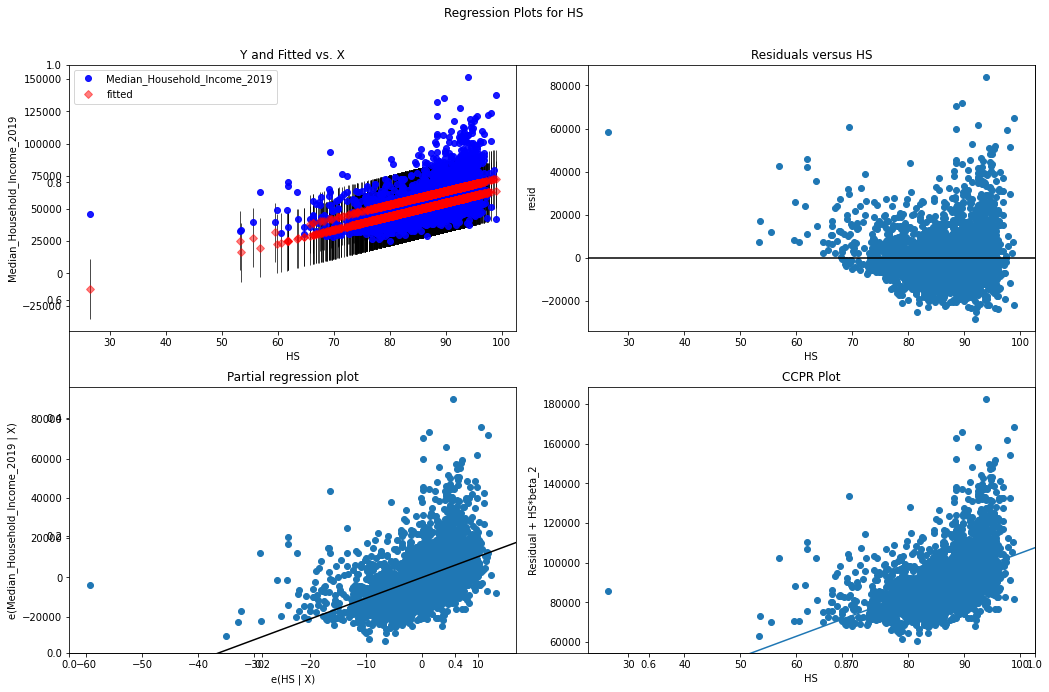

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HS', fig=fig)
plt.show()

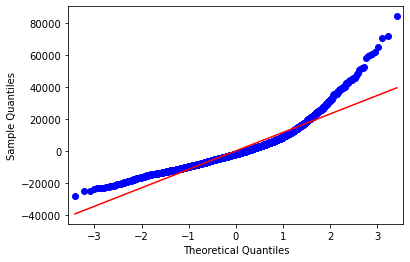

In [6]:
fig = sm.qqplot(results.resid, line="s")

In [7]:
# Right away it is clear that there is no problem with correlation of error terms
# The data is positively skewed with high outliers
# As we can see, the data is not linear, so we need to transform the data

df['HS_sq'] = df['HS']**2
df['HS_cu'] = df['HS']**3
df['HS_fo'] = df['HS']**4
results = smf.ols('Median_Household_Income_2019 ~ HS_sq + HS_cu + HS_fo', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Median_Household_Income_2019   R-squared:                       0.324
Model:                                      OLS   Adj. R-squared:                  0.323
Method:                           Least Squares   F-statistic:                     497.1
Date:                          Fri, 03 Jun 2022   Prob (F-statistic):          6.72e-264
Time:                                  19:33:57   Log-Likelihood:                -33677.
No. Observations:                          3118   AIC:                         6.736e+04
Df Residuals:                              3114   BIC:                         6.739e+04
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.983e+04   1.79e+04      2.222      0.026    4688.607     7.5e+04
HS_sq         28.3309     17.629      1.607      0.108      -6.235      62.897
HS_cu         -0.7704      0.301     -2.556      0.011      -1.361      -0.179
HS_fo          0.0053      0.001      3.705      0.000       0.003       0.008
==============================================================================
Omnibus:                      975.044   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3891.496
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                       7.589   Cond. No.                     5.11e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

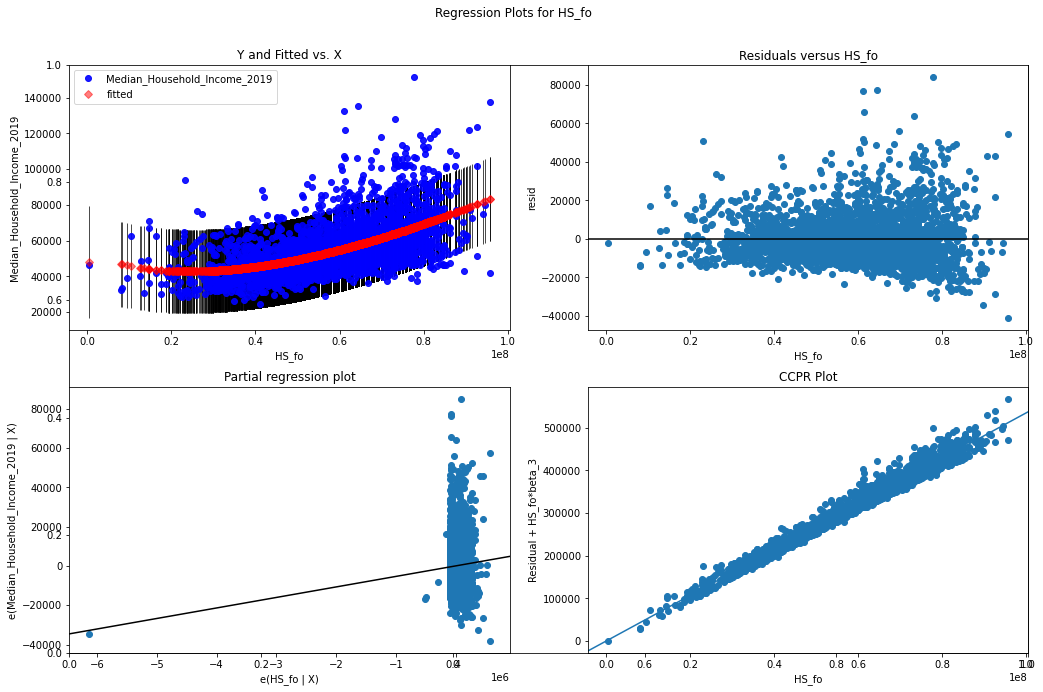

In [8]:
# We can see in the results that HS_sq and HS_cu are not as statistically significant
# HS_fo maintains significance, so we will transform the data this way and plot it.

fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HS_fo', fig=fig)
plt.show()

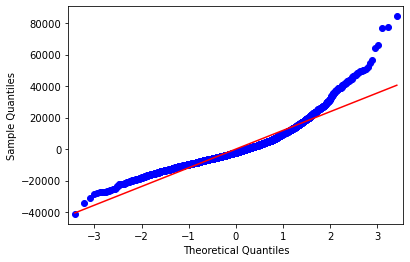

In [9]:
fig = sm.qqplot(results.resid, line="s")

In [10]:
# This transformation made the data more linear.
# It can be seen in the plots above that the data is heteroskedastic. This needs to be altered.

results = smf.ols('np.sqrt(Median_Household_Income_2019) ~ HS_fo', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     np.sqrt(Median_Household_Income_2019)   R-squared:                       0.332
Model:                                               OLS   Adj. R-squared:                  0.332
Method:                                    Least Squares   F-statistic:                     1547.
Date:                                   Fri, 03 Jun 2022   Prob (F-statistic):          3.79e-275
Time:                                           19:33:58   Log-Likelihood:                -14304.
No. Observations:                                   3118   AIC:                         2.861e+04
Df Residuals:                                       3116   BIC:                         2.862e+04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.2522      1.727     97.438      0.000     164.867     171.638
HS_fo       1.119e-06   2.85e-08     39.337      0.000    1.06e-06    1.18e-06
==============================================================================
Omnibus:                      607.168   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.815
Skew:                           1.113   Prob(JB):                    1.41e-290
Kurtosis:                       5.306   Cond. No.                     2.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

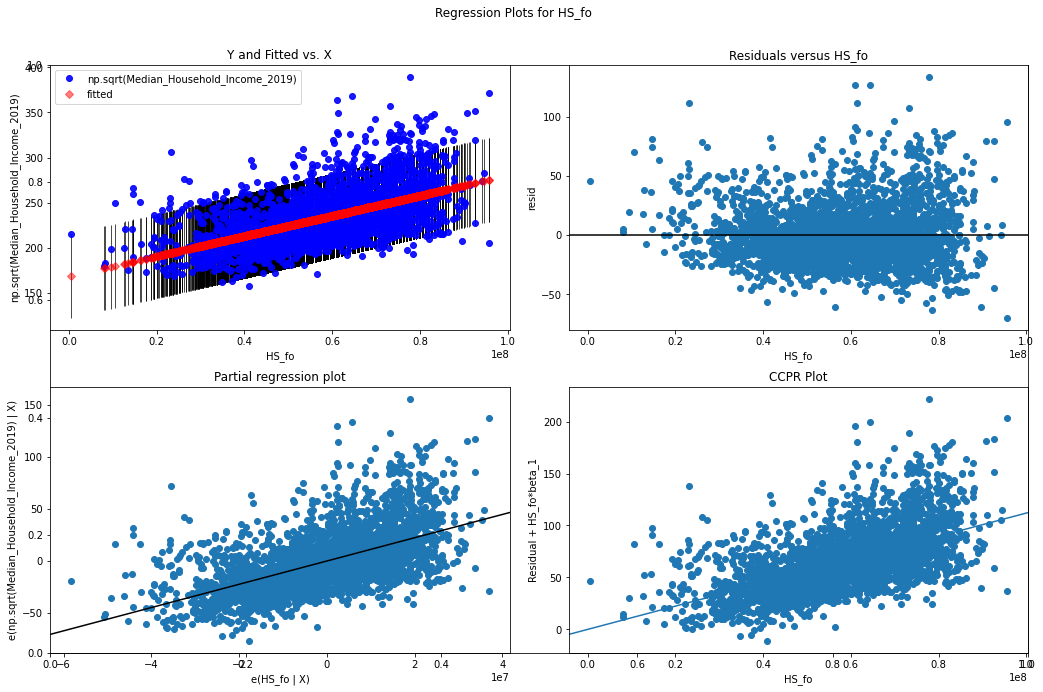

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HS_fo', fig=fig)
plt.show()

In [12]:
# This data looks homoskedastic.

Text(0, 0.5, 'Studentized Residuals')

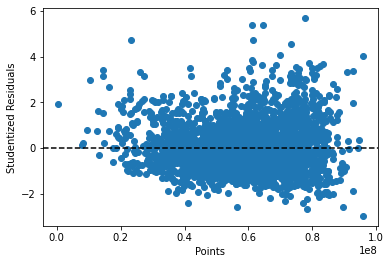

In [13]:
res = results.outlier_test()
res['HS_fo'] = df['HS_fo']
y = res['student_resid']
x = res['HS_fo']
plt.scatter(x,y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')

# There are certainly some outliers on the top side. I am going to remove all data points more that 4 stdevs from the mean

,student_resid,unadj_p,bonf(p),HS_fo
count,3110.000000,3110.000000,3110.000000,3.110000e+03
mean,-0.012191,0.539874,0.999371,5.878892e+07
std,0.971413,0.283074,0.016160,1.495226e+07
min,-2.959289,0.000119,0.372037,4.857532e+05
25%,-0.651109,0.314934,1.000000,4.814819e+07
50%,-0.164713,0.562980,1.000000,6.079149e+07
75%,0.442628,0.777213,1.000000,7.009457e+07
max,3.852407,0.999238,1.000000,9.567207e+07


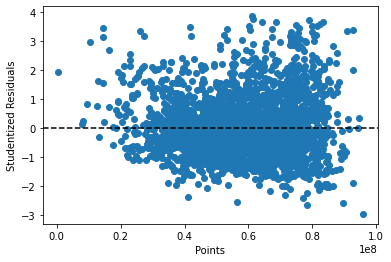

In [14]:
res = res[res['student_resid'] <= 4]
y = res['student_resid']
x = res['HS_fo']
plt.scatter(x,y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')
res.describe()

# The data looks much better after removing the people with abnormally large incomes.
# I do not know how to alter the origional df to exclude these same data points. I would if I knew how!

In [28]:
res.shape
p = 1
n = res.shape[0]

(p+1)/n

0.0006430868167202572

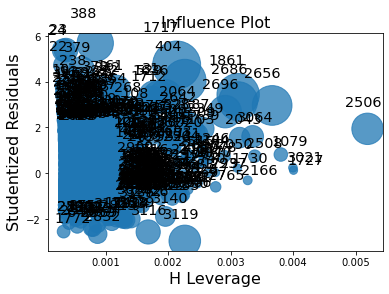

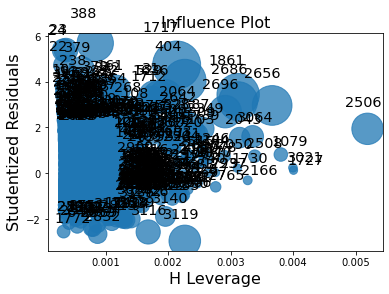

In [16]:
sm.graphics.influence_plot(results)

# This plot shows the high- leverage points. None of these seem too significant. I think it is okay to leave the data as it is

In [17]:
results = smf.ols('np.sqrt(Median_Household_Income_2019) ~ HS_fo + Urban', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     np.sqrt(Median_Household_Income_2019)   R-squared:                       0.423
Model:                                               OLS   Adj. R-squared:                  0.423
Method:                                    Least Squares   F-statistic:                     1143.
Date:                                   Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                                           19:34:11   Log-Likelihood:                -14075.
No. Observations:                                   3118   AIC:                         2.816e+04
Df Residuals:                                       3115   BIC:                         2.817e+04
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.8573      1.606    103.910      0.000     163.709     170.006
HS_fo       9.999e-07    2.7e-08     37.057      0.000    9.47e-07    1.05e-06
Urban         17.9831      0.809     22.220      0.000      16.396      19.570
==============================================================================
Omnibus:                      591.543   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1346.510
Skew:                           1.072   Prob(JB):                    4.07e-293
Kurtosis:                       5.401   Cond. No.                     2.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Median_Household_Income_2019', 'HS_fo', 'Urban']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

# The data is not highly colinear

                        feature        VIF
0  Median_Household_Income_2019  20.623743
1                         HS_fo  18.467627
2                         Urban   2.208512


## Task 4
Repeat the above analysis but with unemployment rate as the response variable. Answer the same questions you did in Task 3.

In [19]:
df['UE'] = df['Unemployment_rate_2019']

results = smf.ols('UE ~ Urban + HS', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UE   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     220.0
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.07e-90
Time:                        19:34:11   Log-Likelihood:                -5390.6
No. Observations:                3118   AIC:                         1.079e+04
Df Residuals:                    3115   BIC:                         1.081e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9424      0.343     31.916      0.000      10.270      11.615
Urban         -0.0851      0.050     -1.703      0.089      -0.183       0.013
HS            -0.0801      0.004    -20.133      0.000      -0.088      -0.072
==============================================================================
Omnibus:                     1699.715   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29393.580
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      17.382   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

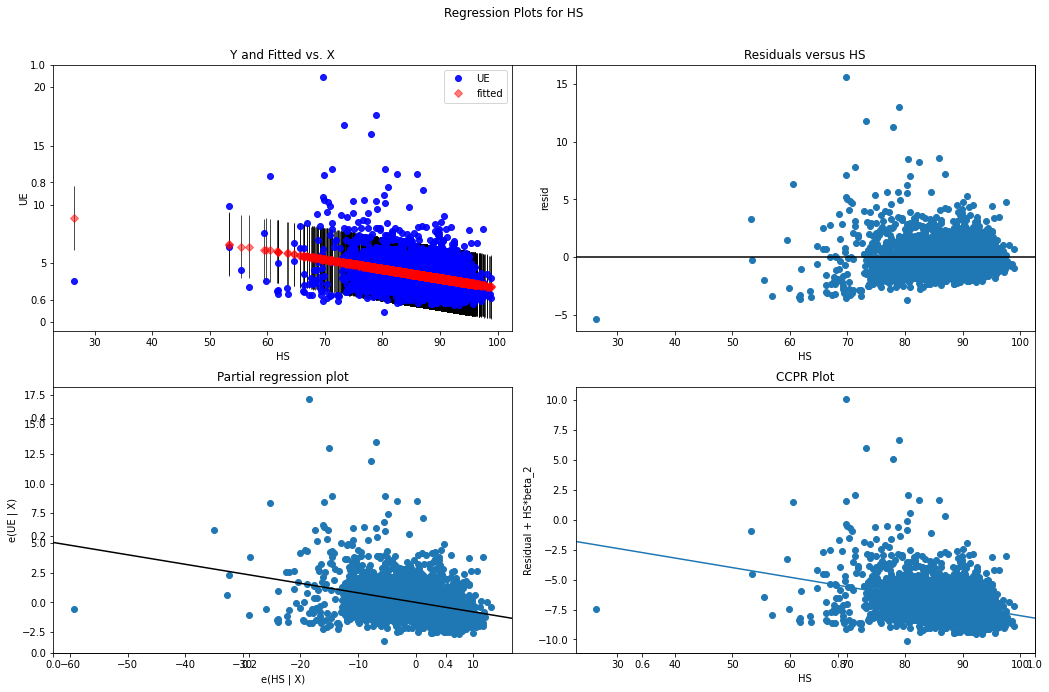

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results, 'HS', fig=fig)
plt.show()

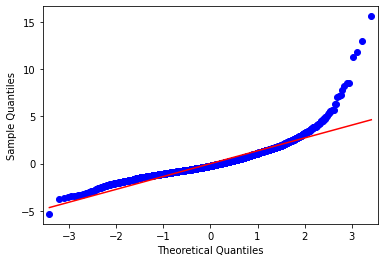

In [21]:
fig = sm.qqplot(results.resid, line="s")

In [22]:
# Right away it is clear that there is no problem with correlation of error terms
# The data is positively skewed with high outliers, according to the qqplot
# The data does not appear to have a linearity problem

df['HS_sq'] = df['HS']**2
df['HS_cu'] = df['HS']**3
df['HS_fo'] = df['HS']**4
results = smf.ols('UE ~ HS_sq + HS_cu + HS_fo', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UE   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     153.7
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           6.60e-93
Time:                        19:34:13   Log-Likelihood:                -5381.3
No. Observations:                3118   AIC:                         1.077e+04
Df Residuals:                    3114   BIC:                         1.079e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6222      2.052      1.278      0.201      -1.401       6.646
HS_sq          0.0035      0.002      1.747      0.081      -0.000       0.007
HS_cu      -6.059e-05   3.45e-05     -1.755      0.079      -0.000    7.08e-06
HS_fo        2.54e-07   1.65e-07      1.537      0.124      -7e-08    5.78e-07
==============================================================================
Omnibus:                     1741.394   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30255.099
Skew:                           2.276   Prob(JB):                         0.00
Kurtosis:                      17.566   Cond. No.                     5.11e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# It can be seen in the plots above that the data is heteroskedastic. This needs to be altered.

results = smf.ols('np.sqrt(UE) ~ HS', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(UE)   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     440.3
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.49e-91
Time:                        19:34:13   Log-Likelihood:                -781.79
No. Observations:                3118   AIC:                             1568.
Df Residuals:                    3116   BIC:                             1580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5775      0.077     46.187      0.000       3.426       3.729
HS            -0.0186      0.001    -20.984      0.000      -0.020      -0.017
==============================================================================
Omnibus:                      599.648   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2119.927
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                       6.581   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

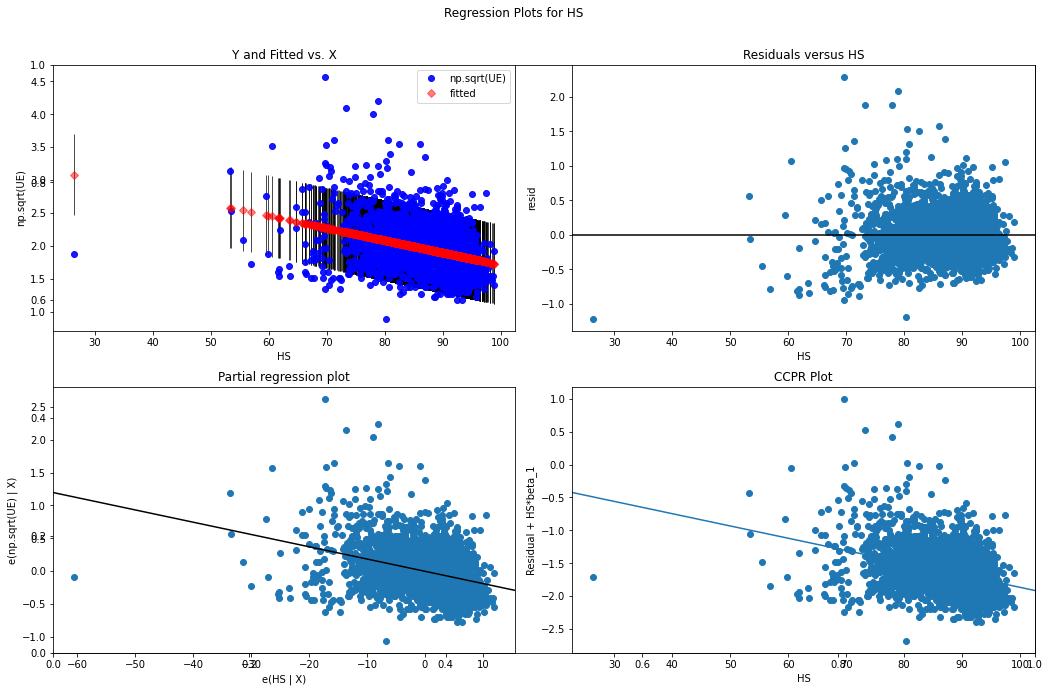

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HS', fig=fig)
plt.show()

# It still is not perfect, but that did help solve the problem

Text(0, 0.5, 'Studentized Residuals')

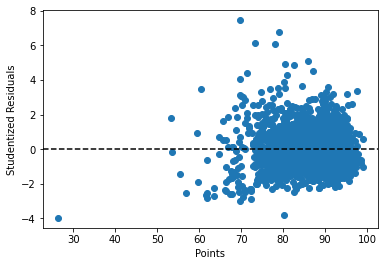

In [25]:
res = results.outlier_test()
res['HS'] = df['HS']
y = res['student_resid']
x = res['HS']
plt.scatter(x,y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')

# There are certainly some outliers on the top side, and a couple on the low end.
# I am going to remove all data points more that 5 stdevs above and 3 stdevs below the mean

,student_resid,unadj_p,bonf(p),HS
count,3110.000000,3.110000e+03,3110.000000,3110.000000
mean,-0.006534,5.307879e-01,0.997897,86.980611
std,0.963128,2.791254e-01,0.043666,6.157138
min,-2.860268,8.371344e-07,0.002610,53.300000
25%,-0.636804,3.033971e-01,1.000000,83.400000
50%,-0.128927,5.469097e-01,1.000000,88.300000
75%,0.542791,7.688185e-01,1.000000,91.600000
max,4.936514,9.999250e-01,1.000000,98.900000


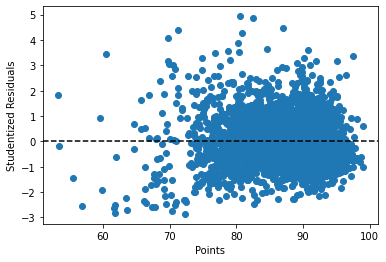

In [26]:
res = res[res['student_resid'] <= 5]
res = res[res['student_resid'] >= -3]
y = res['student_resid']
x = res['HS']
plt.scatter(x,y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')
res.describe()

# The data looks much better after removing the counties with abnormally large and small unemployment rates.
# I do not know how to alter the origional df to exclude these same data points. I would if I knew how!

In [29]:
p = 1
n = res.shape[0]

(p+1)/n

0.0006430868167202572

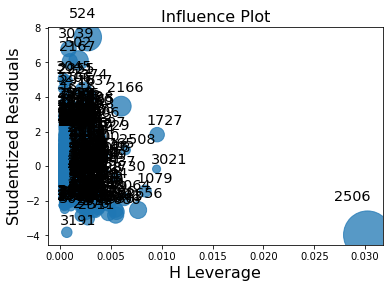

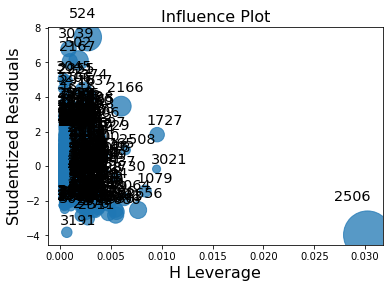

In [30]:
sm.graphics.influence_plot(results)

# This plot shows the high-leverage points. None seem too significant except for 2506. We will remove that record.

In [33]:
df.iloc[2506,:]

FIPS Code                                    21033
State_x                                         KY
Area name                          Caldwell County
2003 Rural-urban Continuum Code                6.0
2003 Urban Influence Code                      6.0
                                        ...       
Urban                                            0
HS_sq                                       7569.0
HS_cu                                     658503.0
HS_fo                                   57289761.0
UE                                             4.8
Name: 2596, Length: 147, dtype: object

In [37]:
df.drop(index=2506, inplace=True)

FIPS Code                                      21055
State_x                                           KY
Area name                          Crittenden County
2003 Rural-urban Continuum Code                  6.0
2003 Urban Influence Code                        6.0
                                         ...        
Urban                                              0
HS_sq                                        7022.44
HS_cu                                     588480.472
HS_fo                                  49314663.5536
UE                                               4.7
Name: 2597, Length: 147, dtype: object

In [38]:
results = smf.ols('np.sqrt(UE) ~ HS + Urban', data=df).fit()
results.summary()
# Urban is statistically insignificant. It should probably be removed from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(UE)   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.01e-93
Time:                        19:53:22   Log-Likelihood:                -773.66
No. Observations:                3117   AIC:                             1553.
Df Residuals:                    3114   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6210      0.079     45.712      0.000       3.466       3.776
HS            -0.0191      0.001    -20.762      0.000      -0.021      -0.017
Urban         -0.0112      0.011     -0.987      0.324      -0.034       0.011
==============================================================================
Omnibus:                      591.874   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2059.066
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       6.523   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['UE', 'HS', 'Urban']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

# The data has relatively low colinearity

  feature       VIF
0      UE  7.149837
1      HS  8.524731
2   Urban  1.941869
